# **Loading data**

In [ ]:
#files uploaded on to Google drive and then accessed by moutning the drive on Google Colab
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
!unzip gdrive/MyDrive/Power_Consumption/household_power_consumption.zip

Archive:  gdrive/MyDrive/Power_Consumption/household_power_consumption.zip
replace household_power_consumption.txt? [y]es, [n]o, [A]ll, [N]one, [r]ename: y
  inflating: household_power_consumption.txt  


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [ ]:
#parsing the text file to convert it into a dataframe with the help of pandas
#converting the date and time columns into a single column and then making it the index
df = pd.read_csv('household_power_consumption.txt',sep = ';',
                parse_dates={'dt':['Date','Time']},
                infer_datetime_format=True,
                low_memory=False, na_values=['nan','?'],
                index_col='dt')

In [ ]:
df

,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
dt,,,,,,,
2006-12-16 17:24:00,4.216,0.418,234.84,18.4,0.0,1.0,17.0
2006-12-16 17:25:00,5.360,0.436,233.63,23.0,0.0,1.0,16.0
2006-12-16 17:26:00,5.374,0.498,233.29,23.0,0.0,2.0,17.0
2006-12-16 17:27:00,5.388,0.502,233.74,23.0,0.0,1.0,17.0
2006-12-16 17:28:00,3.666,0.528,235.68,15.8,0.0,1.0,17.0
...,...,...,...,...,...,...,...
2010-11-26 20:58:00,0.946,0.000,240.43,4.0,0.0,0.0,0.0
2010-11-26 20:59:00,0.944,0.000,240.00,4.0,0.0,0.0,0.0
2010-11-26 21:00:00,0.938,0.000,239.82,3.8,0.0,0.0,0.0


In [ ]:
df = df.resample('D').sum() #resampling the hourly data to daily data

In [ ]:
df

,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
dt,,,,,,,
2006-12-16,1209.176,34.922,93552.53,5180.8,0.0,546.0,4926.0
2006-12-17,3390.460,226.006,345725.32,14398.6,2033.0,4187.0,13341.0
2006-12-18,2203.826,161.792,347373.64,9247.2,1063.0,2621.0,14018.0
2006-12-19,1666.194,150.942,348479.01,7094.0,839.0,7602.0,6197.0
2006-12-20,2225.748,160.998,348923.61,9313.0,0.0,2648.0,14063.0
...,...,...,...,...,...,...,...
2010-11-22,2041.536,142.354,345883.85,8660.4,4855.0,2110.0,10136.0
2010-11-23,1577.536,137.450,346428.76,6731.2,1871.0,458.0,7611.0
2010-11-24,1796.248,132.460,345644.59,7559.4,1096.0,2848.0,12224.0


In [ ]:
years = list(df.index.year)

In [ ]:
years = set(years)

In [ ]:
years

#we can see we have approx 4 years worth of data

{2006, 2007, 2008, 2009, 2010}

In [ ]:
df.isnull().sum()

Global_active_power      0
Global_reactive_power    0
Voltage                  0
Global_intensity         0
Sub_metering_1           0
Sub_metering_2           0
Sub_metering_3           0
dtype: int64

In [ ]:
# Resampling to daily frequency
data = df['Global_active_power'].resample('D').mean()

# Resampling to monthly frequency
df_month = data.resample('M').mean()

# Resampling to annual frequency
df_year = data.resample('A-DEC').mean()

# Resampling to quarterly frequency
df_Q = data.resample('Q-DEC').mean()

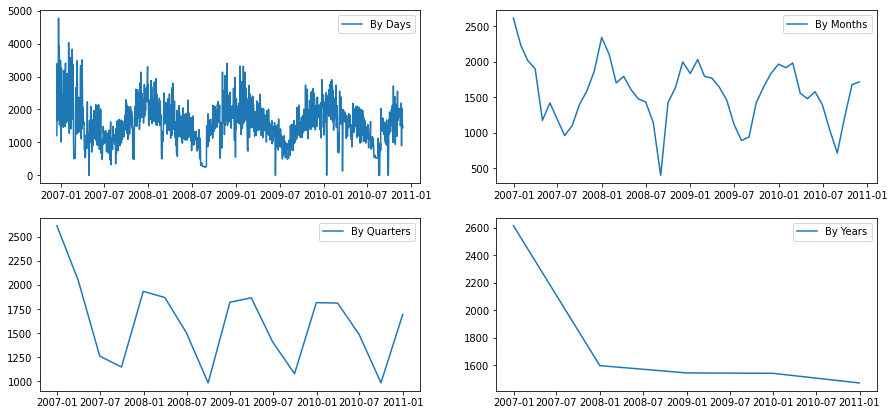

In [ ]:
fig = plt.figure(figsize=[15, 7])

plt.subplot(221)
plt.plot(df['Global_active_power'], '-', label='By Days')
plt.legend()

plt.subplot(222)
plt.plot(df_month, '-', label='By Months')
plt.legend()

plt.subplot(223)
plt.plot(df_Q, '-', label='By Quarters')
plt.legend()

plt.subplot(224)
plt.plot(df_year, '-', label='By Years')
plt.legend()

# plt.tight_layout()
plt.show()

Kurtosis of normal distribution: 1.1854294503176428
Skewness of normal distribution: 0.4367834109870592


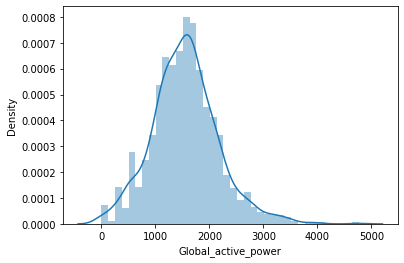

In [ ]:
from scipy import stats
sns.distplot(df.Global_active_power);
print( 'Kurtosis of normal distribution: {}'.format(stats.kurtosis(df.Global_active_power)))
print( 'Skewness of normal distribution: {}'.format(stats.skew(df.Global_active_power)))

Text(0.5, 1.0, 'Global Active Power Distribution')

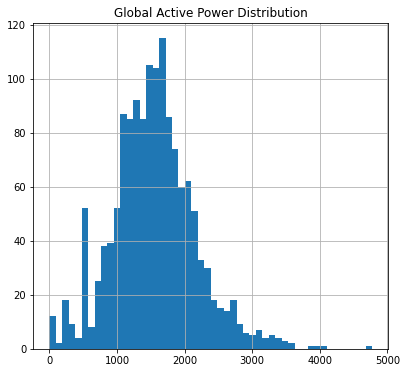

In [ ]:
plt.figure(figsize=(14,6))
plt.subplot(1,2,1)
df['Global_active_power'].hist(bins=50)
plt.title('Global Active Power Distribution')

Dickey-Fuller test

Null Hypothesis (H0): It suggests the time series has a unit root, meaning it is non-stationary. It has some time dependent structure.

Alternate Hypothesis (H1): It suggests the time series does not have a unit root, meaning it is stationary. It does not have time-dependent structure.
p-value > 0.05: Accept the null hypothesis (H0), the data has a unit root and is non-stationary.

p-value <= 0.05: Reject the null hypothesis (H0), the data does not have a unit root and is stationary.

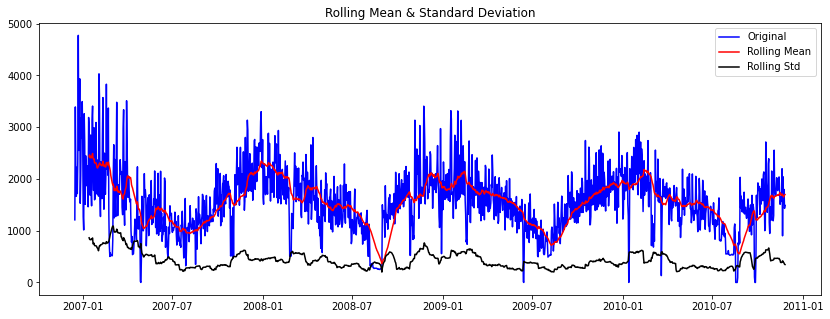

<Results of Dickey-Fuller Test>
Test Statistic                   -3.849777
p-value                           0.002437
#Lags Used                       22.000000
Number of Observations Used    1419.000000
Critical Value (1%)              -3.434967
Critical Value (5%)              -2.863579
Critical Value (10%)             -2.567856
dtype: float64


In [ ]:
from statsmodels.tsa.stattools import adfuller
df2=df.resample('D').mean()

def test_stationarity(timeseries):
    rolmean = timeseries.rolling(window=30).mean()
    rolstd = timeseries.rolling(window=30).std()
    
    plt.figure(figsize=(14,5))
    sns.despine(left=True)
    orig = plt.plot(timeseries, color='blue',label='Original')
    mean = plt.plot(rolmean, color='red', label='Rolling Mean')
    std = plt.plot(rolstd, color='black', label = 'Rolling Std')

    plt.legend(loc='best'); plt.title('Rolling Mean & Standard Deviation')
    plt.show()
    
    print ('<Results of Dickey-Fuller Test>')
    dftest = adfuller(timeseries, autolag='AIC')
    dfoutput = pd.Series(dftest[0:4],
                         index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key] = value
    print(dfoutput)
test_stationarity(df2.Global_active_power.dropna())

From the above results, we will reject the null hypothesis H0, the data does not have a unit root and is stationary.

**In principle we do not need to check for stationarity nor correct for it when we are using an LSTM. However, if the data is stationary, it will help with better performance and make it easier for the neural network to learn.**

# **Building the model and getting predictions**

In [ ]:
dataset = df['Global_active_power'].values
dataset = dataset.astype('float32')
dataset = np.reshape(dataset, (-1, 1))

In [ ]:
dataset.shape

(1442, 1)

In [ ]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler(feature_range=(0, 1))
dataset = scaler.fit_transform(dataset)

In [ ]:
train_size = int(len(dataset) * 0.80)
test_size = len(dataset) - train_size
train, test = dataset[0:train_size,:], dataset[train_size:len(dataset),:]

In [ ]:
def create_dataset(dataset, look_back=1):
    X, Y = [], []
    for i in range(len(dataset)-look_back-1):
        a = dataset[i:(i+look_back), 0]
        X.append(a)
        Y.append(dataset[i + look_back, 0])
    return np.array(X), np.array(Y)

In [ ]:
look_back = 60
X_train, Y_train = create_dataset(train, look_back)
X_test, Y_test = create_dataset(test, look_back)

In [ ]:
X_train.shape

(1092, 60)

In [ ]:
Y_train.shape

(1092,)

In [ ]:
# reshape input to be [samples, time steps, features]
X_train = np.reshape(X_train, (X_train.shape[0], 1, X_train.shape[1]))
X_test = np.reshape(X_test, (X_test.shape[0], 1, X_test.shape[1]))

In [ ]:
import keras
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout
from keras.layers import *

from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from keras.callbacks import EarlyStopping

In [ ]:
model = Sequential()
model.add(LSTM(400, input_shape=(X_train.shape[1], X_train.shape[2])))
model.add(Dropout(0.7))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')

history = model.fit(X_train, Y_train, epochs=20, batch_size=70, validation_data=(X_test, Y_test), 
                    callbacks=[EarlyStopping(monitor='val_loss', patience=10)], verbose=1, shuffle=False)

model.summary()

Epoch 1/20
16/16 [==============================] - 48s 53ms/step - loss: 0.0513 - val_loss: 0.0140
Epoch 2/20
16/16 [==============================] - 0s 19ms/step - loss: 0.0178 - val_loss: 0.0093
Epoch 3/20
16/16 [==============================] - 0s 18ms/step - loss: 0.0165 - val_loss: 0.0084
Epoch 4/20
16/16 [==============================] - 0s 19ms/step - loss: 0.0157 - val_loss: 0.0081
Epoch 5/20
16/16 [==============================] - 0s 21ms/step - loss: 0.0145 - val_loss: 0.0074
Epoch 6/20
16/16 [==============================] - 0s 19ms/step - loss: 0.0136 - val_loss: 0.0071
Epoch 7/20
16/16 [==============================] - 0s 19ms/step - loss: 0.0139 - val_loss: 0.0070
Epoch 8/20
16/16 [==============================] - 0s 17ms/step - loss: 0.0126 - val_loss: 0.0070
Epoch 9/20
16/16 [==============================] - 0s 18ms/step - loss: 0.0122 - val_loss: 0.0067
Epoch 10/20
16/16 [==============================] - 0s 18ms/step - loss: 0.0116 - val_loss: 0.0067
Epoch 11

In [ ]:
train_predict = model.predict(X_train)
test_predict = model.predict(X_test)
# invert predictions
train_predict = scaler.inverse_transform(train_predict)
Y_train = scaler.inverse_transform([Y_train])
test_predict = scaler.inverse_transform(test_predict)
Y_test = scaler.inverse_transform([Y_test])
print('Train Mean Absolute Error:', mean_absolute_error(Y_train[0], train_predict[:,0]))
print('Train Root Mean Squared Error:',np.sqrt(mean_squared_error(Y_train[0], train_predict[:,0])))
print('Test Mean Absolute Error:', mean_absolute_error(Y_test[0], test_predict[:,0]))
print('Test Root Mean Squared Error:',np.sqrt(mean_squared_error(Y_test[0], test_predict[:,0])))

Train Mean Absolute Error: 306.57826534156914
Train Root Mean Squared Error: 410.11643287285506
Test Mean Absolute Error: 289.7885856795666
Test Root Mean Squared Error: 378.8146590158497


Train loss vs Test Loss

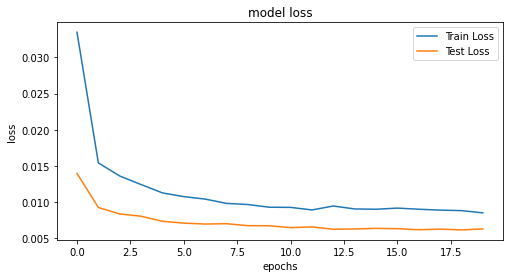

In [ ]:
plt.figure(figsize=(8,4))
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Test Loss')
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epochs')
plt.legend(loc='upper right')
plt.show();

Plotting actual vs predicted

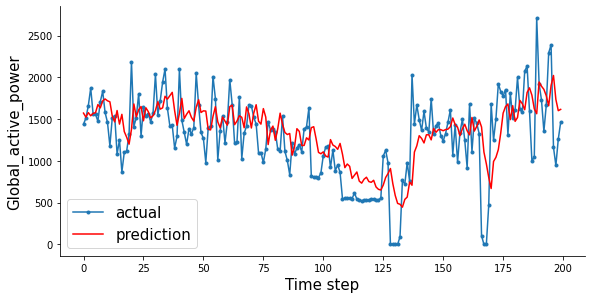

In [ ]:
aa=[x for x in range(200)]
plt.figure(figsize=(8,4))
plt.plot(aa, Y_test[0][:200], marker='.', label="actual")
plt.plot(aa, test_predict[:,0][:200], 'r', label="prediction")
# plt.tick_params(left=False, labelleft=True) #remove ticks
plt.tight_layout()
sns.despine(top=True)
plt.subplots_adjust(left=0.07)
plt.ylabel('Global_active_power', size=15)
plt.xlabel('Time step', size=15)
plt.legend(fontsize=15)
plt.show();

We can see our model worked fairly well as it managed to capture the trend fairly well. However, since we converted data from hourly to daily, it reduced the amount of data and hence the performace was slightly bad.